In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
import warnings
warnings.filterwarnings('ignore')

In [169]:
news = pd.read_csv('data\\news-data.csv')

In [170]:
news.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [171]:
news['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

<AxesSubplot:>

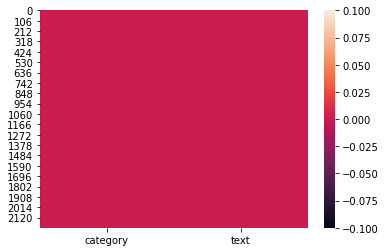

In [148]:
sns.heatmap(news.isnull())

#### There are no any missing values in the data 

<AxesSubplot:xlabel='category', ylabel='count'>

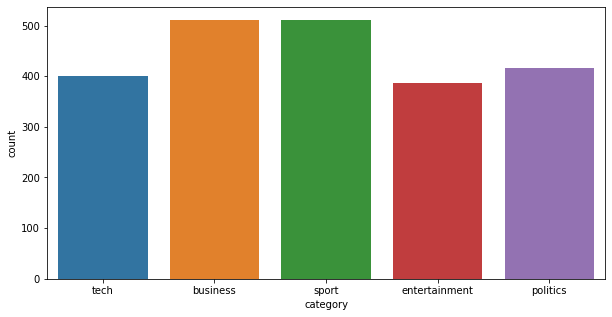

In [149]:
plt.figure(figsize=(10,5))
sns.countplot(news['category'])

In [172]:
X = news.drop('category',axis = 1)
y = news['category']

In [173]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [174]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [177]:
corpus[0]

'tv futur hand viewer home theatr system plasma high definit tv digit video record move live room way peopl watch tv radic differ five year time accord expert panel gather annual consum electron show la vega discuss new technolog impact one favourit pastim us lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devic one talk technolog ce digit person video record dvr pvr set top box like us tivo uk sky system allow peopl record store play paus forward wind tv programm want essenti technolog allow much personalis tv also built high definit tv set big busi japan us slower take europ lack high definit program peopl forward wind advert also forget abid network channel schedul put togeth la cart entertain us network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channel although us lead technolog moment also concern rais europ particularli grow uptak servic like sky happen t

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer().fit(corpus)
X = tf.transform(corpus).toarray()

In [192]:
X.shape

(2225, 18980)

In [194]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(news['category'])
y = pd.Series(le.transform(news['category']))

In [195]:
y

0       4
1       0
2       3
3       3
4       1
       ..
2220    0
2221    2
2222    1
2223    2
2224    3
Length: 2225, dtype: int32

In [159]:
# news['category'] = le.transform(news['category'])

In [196]:
y.unique()

array([4, 0, 3, 1, 2])

In [197]:
news_df = pd.DataFrame(X_train, columns=tf.get_feature_names())
news_df

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhu,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
from sklearn.model_selection import train_test_split
#Split test and training data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [199]:
import itertools

In [200]:
from sklearn.metrics import classification_report

In [205]:
from sklearn.naive_bayes import MultinomialNB
NB_Classifier=MultinomialNB()

In [206]:
NB_Classifier.fit(X_train, y_train)
pred = NB_Classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f\n" % score)

print(classification_report(pred, y_test))
print(pred)

accuracy:   0.969

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       125
           1       0.89      1.00      0.94        85
           2       0.98      0.92      0.95       100
           3       1.00      0.99      0.99       149
           4       0.99      0.96      0.97        98

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557

[0 3 3 3 3 2 2 0 0 3 1 3 0 0 1 3 3 0 4 4 2 3 3 2 2 4 4 3 3 1 2 1 3 2 4 0 2
 0 1 0 4 2 4 3 2 3 0 1 0 1 3 0 2 2 3 3 2 0 0 3 4 1 1 0 0 1 0 4 2 3 3 0 4 3
 1 4 3 2 4 3 3 3 1 0 4 0 2 0 2 1 4 1 3 2 3 3 1 1 4 1 2 4 1 4 3 2 3 1 3 3 1
 2 1 1 3 0 0 0 0 0 1 0 3 0 4 2 1 1 2 3 1 3 2 2 3 2 0 4 4 3 3 2 3 3 3 1 4 0
 3 1 1 3 2 4 2 0 4 3 1 0 0 0 4 4 1 0 4 2 4 3 4 4 0 1 3 0 2 2 0 0 2 3 4 2 2
 4 1 4 3 3 2 0 4 1 4 4 3 0 0 3 4 1 3 4 2 3 3 3 3 4 1 2 0 3 4 0 4 0 1 1 0 2
 3 3 4 3 0 4 0 3 1 4 2 2 4 4 3 0 0 0 0 4 2

<AxesSubplot:>

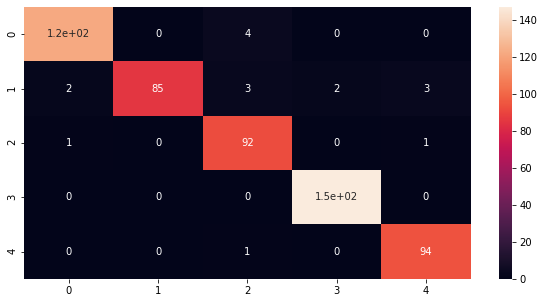

In [207]:
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot = True)

In [1]:
# from sklearn.ensemble import RandomForestClassifier
# Random = RandomForestClassifier(n_estimators=500,random_state=0)
# Random.fit(X_train,y_train)
# y_pred1 = Random.predict(X_test)
# RFscore = metrics.accuracy_score(y_test,y_pred1)
# print("accuracy:  %0.3f\n" %RFscore)

# print(classification_report(y_pred1, y_test))

In [2]:
# cm = metrics.confusion_matrix(y_test, y_pred1)
# plt.figure(figsize=(10,5))
# sns.heatmap(cm, annot = True)

In [208]:
import pickle
pickle.dump(NB_Classifier, open("Nave_Bayes_Classifier.pkl","wb"))
pickle.dump(tf, open("TFIDF.pkl","wb"))
pickle.dump(le, open("LabelEncoder.pkl","wb"))